# Fusion data; Neural Net approach

This notebook covers my attempt at making a neural net to predict fusion experiment results. I will be using Scikit Learn neural nets as they are generally the simplest and best-fitting for what I'm doing; as far as I understand them, the PyTorch neural net methods are better for image classification, which I don't need. 

## Libraries
All the libraries required to run all this code are below.

In [98]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, confusion_matrix
import kagglehub

## Importing data from Kagglehub
This is the quickest and easiest method for importing data directly from Kagglehub; We need to drop the first column of the dataframe as it is just an indexing column and isn't relevant to the data itself.

In [3]:
path = kagglehub.dataset_download("adebusayoadewunmi/nuclearfusion-data") + '/fusion_experiment.csv'
print("Path to dataset files:", path)
fusion = pd.read_csv(path)
fusion = fusion.drop(['Unnamed: 0'], axis=1)
fusion

Path to dataset files: /home/idies/.cache/kagglehub/datasets/adebusayoadewunmi/nuclearfusion-data/versions/1/fusion_experiment.csv


,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0.037454,0.058078,0.028259,0.015705,9.000578,tokamak,5.713125,0.800007,2.026963e+19,deuterium,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,0.095071,0.052697,0.045868,0.009551,3.841421,reversed field pinch,9.819548,0.082642,3.050685e+19,deuterium-tritium,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,0.073199,0.035104,0.009922,0.013794,1.467187,stellarator,7.016781,0.176319,5.287388e+19,tritium,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,0.059866,0.049321,0.044684,0.047349,9.277696,tokamak,4.018930,0.833709,5.961305e+19,deuterium-tritium,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,0.015602,0.036510,0.020308,0.088453,4.926347,reversed field pinch,6.145836,0.808161,7.887942e+19,deuterium,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.079230,0.062215,0.009281,0.075015,6.989681,tokamak,8.363230,0.080241,6.220430e+19,deuterium-tritium,8.029543e+19,3.534515e+08,0.434566,99.917577,130.728901,51.822726,9.611845e+06,6.252602e+10,0
99996,0.077925,0.062922,0.062563,0.027253,9.904975,reversed field pinch,3.718771,0.977716,3.429971e+19,tritium,1.608651e+19,4.554238e+08,0.888713,99.902695,114.869008,9.746068,1.099463e+06,4.545773e+10,0
99997,0.067445,0.019220,0.062666,0.057559,5.389669,tokamak,8.788397,0.374680,4.750184e+19,tritium,3.021016e+19,2.331046e+08,0.323766,99.910285,458.044080,69.116870,7.473165e+06,7.240109e+10,0
99998,0.049945,0.065308,0.004765,0.089334,6.984881,tokamak,3.024949,0.926179,3.030606e+19,deuterium-tritium,4.217068e+19,2.660837e+08,0.646530,99.984932,342.844863,31.591851,6.759779e+06,7.576517e+10,0


## Label Encoding
This section alters the Magnetic Field Configuration and Target Composition columns so that they use integer values instead of strings. 

In [7]:
le = LabelEncoder()
fusion['Magnetic Field Configuration'] = le.fit_transform(fusion['Magnetic Field Configuration']).astype('float64')
fusion['Target Composition'] = le.fit_transform(fusion['Target Composition']).astype('float64')


fusion

,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0.037454,0.058078,0.028259,0.015705,9.000578,2.0,5.713125,0.800007,2.026963e+19,0.0,7.612226e+19,4.050388e+08,0.842126,99.971295,250.726719,55.321517,6.107792e+06,5.443404e+10,0
1,0.095071,0.052697,0.045868,0.009551,3.841421,0.0,9.819548,0.082642,3.050685e+19,1.0,8.742441e+19,2.551963e+08,0.504637,99.951049,345.614166,22.767959,4.921946e+06,8.372016e+10,0
2,0.073199,0.035104,0.009922,0.013794,1.467187,1.0,7.016781,0.176319,5.287388e+19,2.0,8.236610e+19,2.627651e+08,0.357445,99.958831,290.050980,49.872944,9.798230e+06,8.112584e+10,1
3,0.059866,0.049321,0.044684,0.047349,9.277696,2.0,4.018930,0.833709,5.961305e+19,1.0,9.079654e+19,3.104709e+08,0.992195,99.997186,436.491093,2.656182,5.611293e+06,4.423307e+10,1
4,0.015602,0.036510,0.020308,0.088453,4.926347,0.0,6.145836,0.808161,7.887942e+19,0.0,8.186142e+19,3.258529e+08,0.648677,99.927054,198.773196,48.096005,8.541064e+06,2.245276e+10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.079230,0.062215,0.009281,0.075015,6.989681,2.0,8.363230,0.080241,6.220430e+19,1.0,8.029543e+19,3.534515e+08,0.434566,99.917577,130.728901,51.822726,9.611845e+06,6.252602e+10,0
99996,0.077925,0.062922,0.062563,0.027253,9.904975,0.0,3.718771,0.977716,3.429971e+19,2.0,1.608651e+19,4.554238e+08,0.888713,99.902695,114.869008,9.746068,1.099463e+06,4.545773e+10,0
99997,0.067445,0.019220,0.062666,0.057559,5.389669,2.0,8.788397,0.374680,4.750184e+19,2.0,3.021016e+19,2.331046e+08,0.323766,99.910285,458.044080,69.116870,7.473165e+06,7.240109e+10,0
99998,0.049945,0.065308,0.004765,0.089334,6.984881,2.0,3.024949,0.926179,3.030606e+19,1.0,4.217068e+19,2.660837e+08,0.646530,99.984932,342.844863,31.591851,6.759779e+06,7.576517e+10,0


## Normalizing data
Normalizing data is the process of simplifying everything so that the values are all as small as possible, thereby making processing easier.

In [8]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(fusion)
fusion = pd.DataFrame(scaled_data, columns=fusion.columns)
fusion

,Magnetic Field Fluctuations,Leakage,Instabilities,Plasma Instabilities,Magnetic Field Strength,Magnetic Field Configuration,Injection Energy,Beam Symmetry,Target Density,Target Composition,Fuel Density,Temperature,Confinement Time,Fuel Purity,Energy Input,Power Output,Pressure,Neutron Yield,Ignition
0,0.374540,0.580783,0.282592,0.157053,0.888952,1.0,0.523681,0.800006,0.114107,0.0,0.734697,0.762599,0.824589,0.712955,0.376815,0.553218,0.567532,0.493704,0.0
1,0.950722,0.526975,0.458685,0.095507,0.315699,0.0,0.979955,0.082602,0.227855,0.5,0.860278,0.387991,0.449594,0.510491,0.614049,0.227680,0.435771,0.819116,0.0
2,0.731998,0.351038,0.099215,0.137938,0.051889,0.5,0.668533,0.176283,0.476379,1.0,0.804074,0.406913,0.286044,0.588316,0.475132,0.498732,0.977582,0.790289,1.0
3,0.598661,0.493215,0.446845,0.473491,0.919744,1.0,0.335435,0.833710,0.551260,0.5,0.897747,0.526178,0.991335,0.971876,0.841257,0.026562,0.512366,0.380356,1.0
4,0.156015,0.365097,0.203084,0.884539,0.436249,0.0,0.571760,0.808160,0.765332,0.0,0.798467,0.564633,0.609641,0.270543,0.246922,0.480962,0.837896,0.138345,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0.792310,0.622155,0.092810,0.750152,0.665514,1.0,0.818140,0.080201,0.580052,0.5,0.781067,0.633630,0.371735,0.175771,0.076800,0.518230,0.956872,0.583618,0.0
99996,0.779258,0.629225,0.625644,0.272528,0.989443,0.0,0.302084,0.977725,0.269998,1.0,0.067626,0.888561,0.876353,0.026950,0.037147,0.097461,0.011050,0.393964,0.0
99997,0.674457,0.192202,0.626674,0.575591,0.487731,1.0,0.865381,0.374656,0.416690,1.0,0.224557,0.332762,0.248621,0.102846,0.895143,0.691172,0.719241,0.693344,0.0
99998,0.499448,0.653088,0.047649,0.893344,0.664981,1.0,0.224991,0.926185,0.225624,0.5,0.357454,0.415210,0.607255,0.849331,0.607126,0.315920,0.639975,0.730724,0.0


## Train-test-split
Here we are generating and splitting data into training and testing subsets; doing this allows for the model to gather information and then have something to test what it's been taught so that we can check its accuracy. The test size has been set to 20% of the data, meaning the remaining 80% is training data. 

In [27]:
X, y = fusion.drop(['Ignition'], axis=1), fusion['Ignition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Initilization of the neural network model
This is, quite simply, the process of creating a neural net class and training it on the data we've produced with the train-test split. For this, we've initialized the model with four hidden layers of neurons, starting at 128 neurons in the first layer and halving our way down to 16 at the fourth layer.

In [57]:
pony = MLPClassifier(hidden_layer_sizes=(64, 32, 16, 8),
                    max_iter=1000)
pony.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32, 16, 8), max_iter=1000)

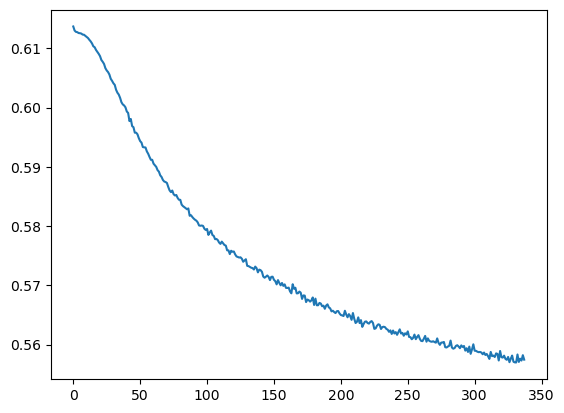

In [59]:
plt.plot(pony.loss_curve_)

## Examination of model accuracy
Below are the functions that describe the model's accuracy; first, we test its training accuracy, then move onto its testing accuracy, and then we take the mean-squared-error from the target training data and the training prediction. 

In [62]:
#(64, 32, 16, 8) layers
train_accuracy = pony.score(X_train, y_train)
test_accuracy = pony.score(X_test, y_test)
mse = mean_squared_error(y_train, pony.predict(X_train))
print(f'train accuracy = {train_accuracy}')
print(f'test accuracy = {test_accuracy}')
print(f'mean squared error = {mse}')

train accuracy = 0.7194
test accuracy = 0.663
mean squared error = 0.2806


In [ ]:
#tritium = 0
#deuterium = 0.5
#deuterium-tritium = 1
#tokamak = 0
#reversed field pinch# = 0.5
#stellarator = 1

In [97]:
train_pred = pony.predict(X_train)

In [71]:
np.reshape(train_pred, (70000, 1))

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

## Plotting data based on magnetic field configuration
We want to plot the data based on the configuration of the magnetic field for each given entry of X_train and train_pred so that we can see the correlation between mfc and ignition. To do so, we first reshape the train_pred array so that it's a column instead of a row. 
Next, we add each entry of the Magnetic Field Conguration column from X_train to a separate array that we can later use for indexing.
We repeat this also with the Target Composition.

In [ ]:
mfc_arr = []
for i, row in X_train.iterrows():
    s = row['Magnetic Field Configuration']
    if (s == 0):
        mfc_arr.append(0)
    elif (s == 0.5):
        mfc_arr.append(0.5)
    elif (s == 1):
        mfc_arr.append(1)
mfc_arr

In [109]:
targ_arr = []
for i, row in X_train.iterrows():
    s = row['Target Composition']
    if (s == 0):
        targ_arr.append(0)
    elif (s == 0.5):
        targ_arr.append(0.5)
    elif (s == 1):
        targ_arr.append(1)